# PyWORLDによる音声の分析再合成

In [8]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import pyworld

In [2]:
IN_WAVE_FILE = "in.wav"       # 入力音声
OUT_WAVE_FILE = "out.wav"     # 分析再合成した音声

In [3]:
# 音声の読み込み
fs, x = wavfile.read(IN_WAVE_FILE)
x = x.astype(np.float64)

In [4]:
# 音声の分析 (基本周波数、スペクトル包絡、非周期性指標)
f0, sp, ap = pyworld.wav2world(x, fs)

In [5]:
# 音声の再合成
y = pyworld.synthesize(f0, sp, ap, fs)
y = y.astype(np.int16)

In [6]:
# wavファイルに保存
wavfile.write(OUT_WAVE_FILE, fs, y)

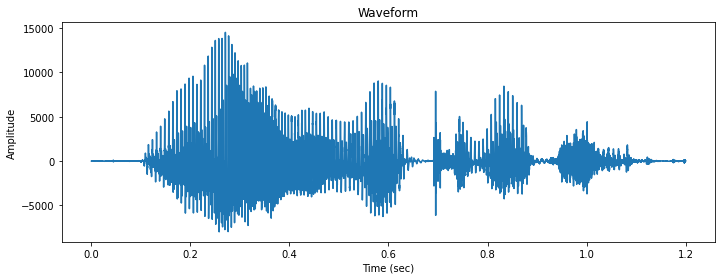

In [9]:
# オリジナルの音声をプロット
n_samples = len(x)
time = np.arange(n_samples) / fs # 時間軸の設定

plt.figure(figsize=(10, 4)) # プロット枠を確保 (10がヨコのサイズ、4はタテのサイズ)
plt.xlabel("Time (sec)") # x軸のラベル
plt.ylabel("Amplitude") # y軸のラベル
plt.title("Waveform") # 画像のタイトル
plt.tight_layout() # 余白を最小化
plt.plot(time, x) # 波形のプロット

In [10]:
x = x.astype(np.int16)
Audio(x, rate=fs) # オリジナルの音声

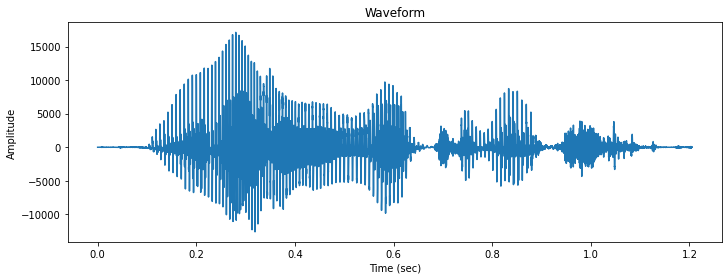

In [13]:
# 再合成した音声をプロット
n_samples = len(y)
time = np.arange(n_samples) / fs # 時間軸の設定

plt.figure(figsize=(10, 4)) # プロット枠を確保 (10がヨコのサイズ、4はタテのサイズ)
plt.xlabel("Time (sec)") # x軸のラベル
plt.ylabel("Amplitude") # y軸のラベル
plt.title("Waveform") # 画像のタイトル
plt.tight_layout() # 余白を最小化
plt.plot(time, y) # 波形のプロット

In [14]:
Audio(y, rate=fs) # 再合成した音声